In [1]:
#importing the all required libraries
import pandas as pd
import json
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
import torch

In [2]:
#loading the dataset and removing the error
try:
    df = pd.read_csv('ie_dataset.csv')
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")


In [3]:
print(df.iloc[2708:2714])


      Unnamed: 0                                        description  \
2708        3046     Marked right hydronephrosis without hydruria.    
2709        3047   Clogged AV shunt.  The patient complains of f...   
2710        3048                Followup on chronic kidney disease.   
2711        3049   This is a 48-year-old black male with stage I...   
2712        3050   Left forearm arteriovenous fistula between ce...   
2713        3051   Creation of autologous right brachiobasilic a...   

                                          transcription  
2708  CHIEF COMPLAINT:,  Right hydronephrosis.,HISTO...  
2709  REASON FOR CONSULTATION: , Clogged AV shunt.,H...  
2710  REASON FOR VISIT:,  Followup on chronic kidney...  
2711  HISTORY OF PRESENT ILLNESS: , This is a 48-yea...  
2712  PREOPERATIVE DIAGNOSES,1.  End-stage renal dis...  
2713  PREOPERATIVE DIAGNOSES,1.  End-stage renal dis...  


In [4]:
# here we use the encoding for the binary system means encoding
df = pd.read_csv('ie_dataset.csv', encoding='utf-8')
df

,Unnamed: 0,description,transcription
0,0,A 23-year-old white female presents with comp...,"SUBJECTIVE:, This 23-year-old white female pr..."
1,1,Consult for laparoscopic gastric bypass.,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,2,Consult for laparoscopic gastric bypass.,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,3,2-D M-Mode. Doppler.,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,4,2-D Echocardiogram,1. The left ventricular cavity size and wall ...
...,...,...,...
4656,4994,Patient having severe sinusitis about two to ...,"HISTORY:, I had the pleasure of meeting and e..."
4657,4995,This is a 14-month-old baby boy Caucasian who...,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH..."
4658,4996,A female for a complete physical and follow u...,"SUBJECTIVE: , This is a 42-year-old white fema..."
4659,4997,Mother states he has been wheezing and coughing.,"CHIEF COMPLAINT: , This 5-year-old male presen..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4661 entries, 0 to 4660
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4661 non-null   int64 
 1   description    4661 non-null   object
 2   transcription  4636 non-null   object
dtypes: int64(1), object(2)
memory usage: 109.4+ KB


In [6]:
df.describe()

,Unnamed: 0
count,4661.000000
mean,2620.501609
std,1419.478498
min,0.000000
25%,1503.000000
50%,2668.000000
75%,3833.000000
max,4998.000000


In [7]:
# loding the json train dataset
train_data_path = 'train.json'
with open(train_data_path, 'r') as f:
    train_data = json.load(f)

In [8]:
train_data

{'data': [{'paragraphs': [{'qas': [{'question': ' How old is the patient?',
       'id': 625398,
       'answers': [{'answer_id': 676907,
         'document_id': 1298870,
         'question_id': 625398,
         'text': '30',
         'answer_start': 270,
         'answer_end': 272,
         'answer_category': None}],
       'is_impossible': False},
      {'question': 'What is the gender of the Patient',
       'id': 625404,
       'answers': [{'answer_id': 676908,
         'document_id': 1298870,
         'question_id': 625404,
         'text': ' female',
         'answer_start': 281,
         'answer_end': 288,
         'answer_category': None}],
       'is_impossible': False},
      {'question': 'Does the patient have any complaints?',
       'id': 625399,
       'answers': [{'answer_id': 676909,
         'document_id': 1298870,
         'question_id': 625399,
         'text': 'overweight ',
         'answer_start': 303,
         'answer_end': 314,
         'answer_category': None}]

In [9]:
# loading the test json dataset
test_data_path = 'test.json'
with open(test_data_path, 'r') as f:
    test_data = json.load(f)

In [10]:
test_data

{'data': [{'paragraphs': [{'qas': [{'question': 'Does the patient have any complaints?',
       'id': 625466,
       'answers': [{'answer_id': 677083,
         'document_id': 1298896,
         'question_id': 625466,
         'text': 'Urinary retention',
         'answer_start': 19,
         'answer_end': 36,
         'answer_category': None}],
       'is_impossible': False},
      {'question': 'What is the reason for this consultation?',
       'id': 625467,
       'answers': [{'answer_id': 677085,
         'document_id': 1298896,
         'question_id': 625467,
         'text': 'prescription',
         'answer_start': 3371,
         'answer_end': 3383,
         'answer_category': None}],
       'is_impossible': False},
      {'question': 'What other symptoms does the patient have?',
       'id': 625468,
       'answers': [{'answer_id': 677086,
         'document_id': 1298896,
         'question_id': 625468,
         'text': 'symptoms of benign prostatic hypertrophy',
         'answer_

In [11]:
# implementing the bert model for the whole word masking and tokenization and question answering
model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you a

In [12]:
# this is the required question which is asked in the question
questions = {
    "age": "How old is the patient?",
    "complaints": "Does the patient have any complaints?",
    "reason_for_consultation": "What is the reason for this consultation?",
    "gender": "Gender of Patient?"
}

In [13]:
# define a function for the extraction of the information
def extract_information(transcription, question):
    inputs = tokenizer(question, transcription, return_tensors="pt")
    outputs = model(**inputs)
    start_idx = torch.argmax(outputs.start_logits)
    end_idx = torch.argmax(outputs.end_logits) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs["input_ids"][0][start_idx:end_idx]))
    return answer

In [14]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Encode the sequence with truncation and padding
encoding = tokenizer("Your input sequence here.", truncation=True, padding='max_length', max_length=512)


In [15]:
import torch
a = torch.randn(595, 10)
b = torch.randn(512, 10)
if a.size(1) != b.size(1):
    a = a[:, :b.size(1)]
result = torch.cat((a, b), dim=0)


In [16]:

transcription = "Age: 23 - year - old\nComplaints: allergies\nReason_for_consultation: allergic rhinitis\nGender: white female"
encoding = tokenizer(transcription, truncation=True, padding='max_length', max_length=512, return_tensors='pt')
print(type(transcription))


<class 'str'>


In [17]:
transcription_str = str(transcription)
encoding = tokenizer(transcription_str, truncation=True, padding='max_length', max_length=512, return_tensors='pt')


In [18]:
print(transcription)


Age: 23 - year - old
Complaints: allergies
Reason_for_consultation: allergic rhinitis
Gender: white female


In [19]:
from sklearn.metrics import f1_score
ground_truth_answers = {
    "age": ["23"],
    "complaints": ["allergies"],
    "reason_for_consultation": ["allergic rhinitis"],
    "gender": ["white female"]
}
predicted_answers = {}
for info_type, question in questions.items():
    predicted_answer = extract_information(transcription, question)
    predicted_answers[info_type] = [predicted_answer]
f1_scores = {}
for info_type in questions.keys():
    true_labels = ground_truth_answers[info_type]
    predicted_labels = predicted_answers[info_type]
    f1 = f1_score(true_labels, predicted_labels, average='micro')
    f1_scores[info_type] = f1

for info_type, f1 in f1_scores.items():
    print(f"{info_type.capitalize()} F1 Score: {f1}")


Age F1 Score: 0.0
Complaints F1 Score: 1.0
Reason_for_consultation F1 Score: 1.0
Gender F1 Score: 1.0


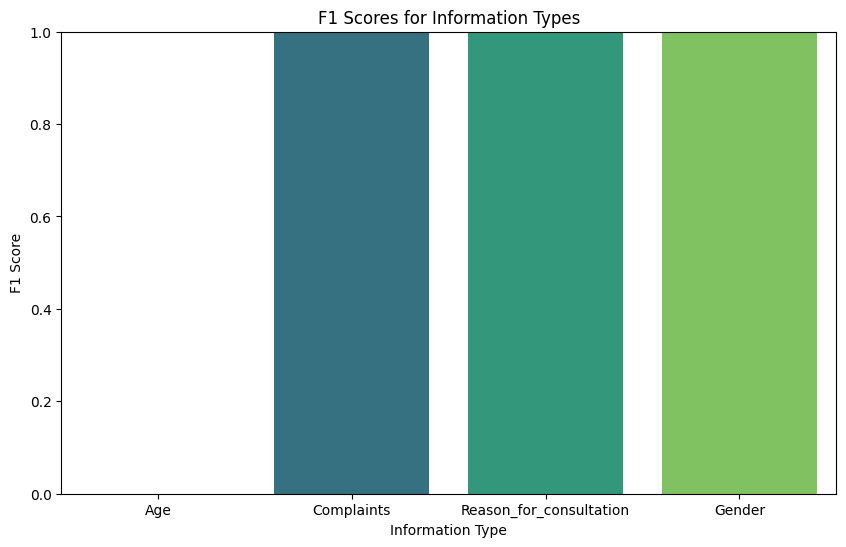

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
f1_scores = {
    "Age": 0.0,
    "Complaints": 1.0,
    "Reason_for_consultation": 1.0,
    "Gender": 1.0
}
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Information Type', 'F1 Score'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Information Type', y='F1 Score', data=f1_df, palette='viridis')
plt.title('F1 Scores for Information Types')
plt.ylim(0, 1)
plt.show()
